# TP 1 : FC & CNN

**Il est interdit d'utiliser la fonction 'compile' de TensorFlow pour ce TP**

Veillez à commenter votre code, vous pouvez aussi ajouter des cellules de markdown dans lesquelles vous expliquez vos raisonnements et les raisons de vos choix.
Ces commentaires seront pris en compte pour l'évaluation du travail.

Le but de ce TP sera de vous familiariser avec l'utilisation de TensorFlow et Keras pour la création et l'entraînement de modèles fully-connected puis à convolutions simples.
Vous entraînerez des modèles sur une tâche de classification sur les jeux de données MNIST.
Ces jeux de données sont composés d'images de dimensions 28x28 et ont l'avantage d'être très simples d'utilisation ainsi que de permettre un apprentissage rapide.

Nous allons utiliser la librairie TensorFlow et faire tourner notre code sous Google Colab pour nos TP, ce qui aura l'avantage de nous permettre d'utiliser les GPUs mis à disposition gratuitement par Google.
Vous êtes libre d'utiliser une autre librairie que TensorFlow si vous en maîtrisez une autre ou votre machine personnelle si celle-ci possède un GPU suffisant, mais il est probable que les phases d'entraînement soit plus rapides sous Colab.

N'hésitez pas à vous référer aux docs de TensorFlow 2 et Keras disponibles sur internet lors de ce TP.

Ce TP s'effectue individuellement ou en binome.
Veuillez respecter les consignes suivantes pour le rendu de votre travail :

*   Renommez le selon le format suivant : "DL_2023_TP_CNN_prenom1_nom1_prenom2_nom2.ipynb".
*   Veillez à ce que vos noms et prénoms soient complétés dans la cellule ci-dessous.
*   Veillez à avoir bien exécuté toutes les cellules de code et que les résultats soient tous bien visible dans le notebook sans nécessiter une ré-exécution.
*   Partagez le notebook avec ranvier.thomas.pro@gmail.com.

Si vous avez effectué le TP autrement que sur Google Colab :

*   Renommez le selon le format suivant : "DL_2023_TP_CNN_prenom1_nom1_prenom2_nom2.ipynb".
*   Téléchargez le fichier ipynb.
*   Envoyez le fichier en pièce-jointe à ranvier.thomas.pro@gmail.com, en indiquant en tant qu'objet : "TP CNN prenom1 nom1 prenom2 nom2".
---

## Veuillez compléter vos noms et prénoms ci-dessous :

*   **Prenom 1** : Yann
*   **Nom 1** : VINCENT
*   **Prenom 2** : Kevin
*   **Nom 2** : TANG

In [ ]:
import tensorflow as tf

# Si vous obtenez une erreur à ce niveau veuillez suivre ces indications :
# "Modifier" > "Paramètres du notebook" > "Accélérateur matériel" > "GPU"
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print(f'Found GPU: {device_name}')

Found GPU: /device:GPU:0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

---
# Preparation des données MNIST

Vous allez utiliser le jeu de données MNIST qui contient des chiffres ayant été écrit à la main, le but va être de créer des réseaux de neurones qui vont apprendre à reconnaître et correctement classifier ces chiffres.

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Il est important de toujours normaliser les données entre 0 et 1 pour qu'un réseau de neurones soit capable de les traiter convenablement.

Normalisez les données entre 0 et 1

In [ ]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

Ajoutez une dimension vide supplémentaire aux données, elle correspond à la dimension des channels nécessaire pour les opérations de convolutions.

Par exemple, les dimensions de x_train sont (60000, 28, 28), elles doivent devenir (60000, 28, 28, 1)

In [ ]:
import numpy as np

In [ ]:
# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

*Séparez* le jeu de données d'entraînement en un jeu de validation de taille 10000 et un nouveau jeu d'entraînement de taille 50000.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
# Split train val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=10000, random_state=0)

In [ ]:
x_train.shape

(50000, 28, 28, 1)

In [ ]:
x_val.shape

(10000, 28, 28, 1)

Si les traîtements effectués ci-dessus sur les données sont corrects l'execution de la cellule de code suivante devrait vous afficher les 25 premières images d'entraînement associées à leurs labels.

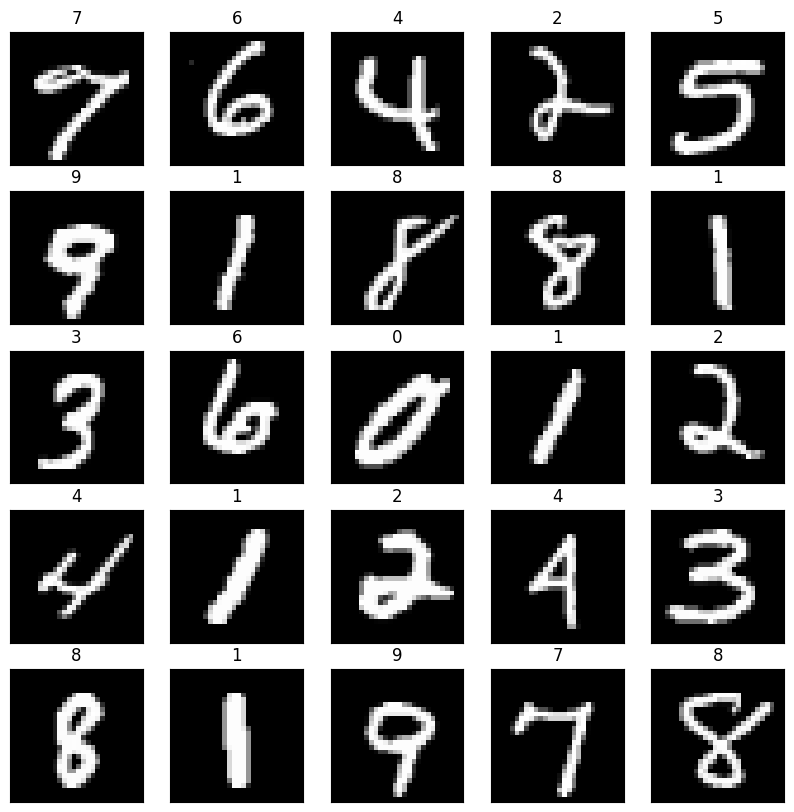

In [ ]:
# Plot grid with first 25 training images with their corresponding label
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(y_train[i])
plt.show()

---
# Entraîner un modèle fully-connected sur les données MNIST

Il faut maintenant définir un modèle fully-connected, l'entrainer sur le jeu d'entraînement et évaluer ses performances en terme d'accuracy (https://keras.io/api/metrics/accuracy_metrics/) sur le jeu de test.
Il faudra chercher la meilleure architecture et les meilleurs paramètres possibles de manière empirique en testant différentes valeurs pour chaque.
Avec de bons paramètres vous devriez pouvoir atteindre une accuracy d'au minimum 96% sur le jeu de test.
Reportez vous à la documentation Keras https://keras.io/api/ pour prendre connaissance des différentes fonctionnalités utilisables ainsi que les paramètres qu'il est possible de modifier pour chaque.

Objectifs principaux :
- Définir une architecture et des hyper-paramètres adaptés
- Obtenir 96% d'accuracy sur le jeu de test

Objectifs secondaires :
- Entraînement en mini-batches
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu d'entrainement sur un graph
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu de validation sur un graph

Epoch 1/50, Train Loss: 1.3687522411346436, Train Accuracy: 0.6477400064468384, Validation Loss: 0.6809296011924744, Validation Accuracy: 0.8295000195503235
Epoch 2/50, Train Loss: 0.5201706886291504, Train Accuracy: 0.8638200163841248, Validation Loss: 0.40125998854637146, Validation Accuracy: 0.891700029373169
Epoch 3/50, Train Loss: 0.37066784501075745, Train Accuracy: 0.8992999792098999, Validation Loss: 0.32581302523612976, Validation Accuracy: 0.9107000231742859
Epoch 4/50, Train Loss: 0.3175676465034485, Train Accuracy: 0.9125999808311462, Validation Loss: 0.2891358435153961, Validation Accuracy: 0.9194999933242798
Epoch 5/50, Train Loss: 0.28654900193214417, Train Accuracy: 0.9210600256919861, Validation Loss: 0.26458802819252014, Validation Accuracy: 0.9254000186920166
Epoch 6/50, Train Loss: 0.2635371685028076, Train Accuracy: 0.927299976348877, Validation Loss: 0.24567240476608276, Validation Accuracy: 0.9300000071525574
Epoch 7/50, Train Loss: 0.2446165382862091, Train Accu

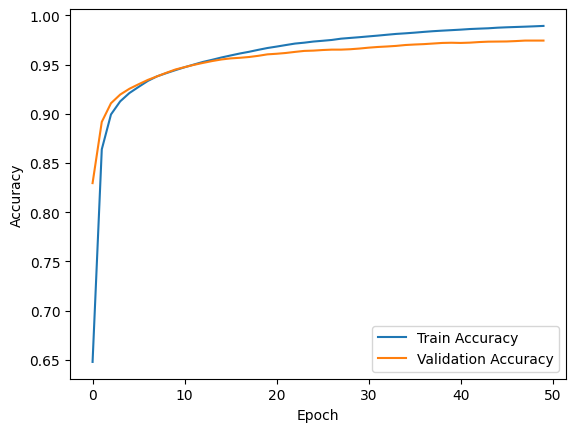

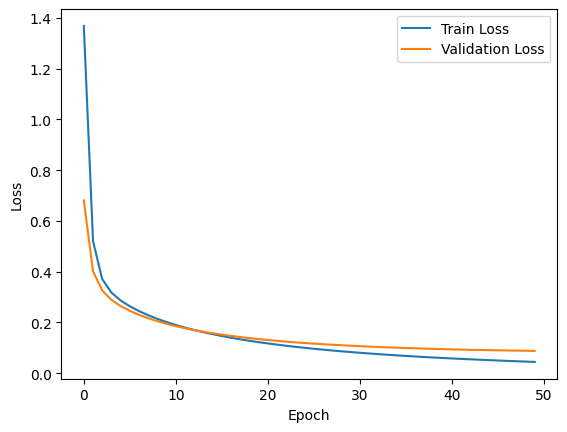

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 50

split_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(2500)

# Initialisation des listes pour le suivi de l'évolution
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training here
for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x_batch, y_batch in split_ds:
        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = loss_function(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Suivi de l'évolution sur le jeu d'entraînement
        epoch_loss_avg.update_state(loss)
        epoch_accuracy.update_state(y_batch, predictions)

    train_losses.append(epoch_loss_avg.result().numpy())
    train_accuracies.append(epoch_accuracy.result().numpy())

    # Évaluation sur le jeu de validation
    val_predictions = model(x_val)
    val_loss = loss_function(y_val, val_predictions)
    val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, val_predictions)

    # Suivi de l'évolution sur le jeu de validation
    val_losses.append(val_loss.numpy())
    val_accuracies.append(val_accuracy.numpy())

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")


# Plot training history
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:
test_predictions = model(x_val)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, test_predictions)

In [ ]:
test_accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.9744>

---
# Entraîner un modèle à convolutions sur les données MNIST

Il faut maintenant définir un modèles à convolutions, l'entrainer sur le jeu d'entraînement et évaluer ses performances sur le jeu de test.
Il faudra chercher la meilleure architecture et les meilleurs paramètres possibles de manière empirique en testant différentes valeurs pour chaque.
Avec de bons paramètres vous devriez pouvoir atteindre une accuracy d'au minimum 98% sur le jeu de test.

Objectifs principaux :
- Définir une architecture et des hyper-paramètres adaptés
- Obtenir 98% d'accuracy sur le jeu de test

Objectifs secondaires :
- Entraînement en mini-batches
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu d'entrainement sur un graph
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu de validation sur un graph
- Utilisation de batch-normalizations
- Utilisation d'un dropout

Epoch 1/50, Train Loss: 0.8876802325248718, Train Accuracy: 0.7655799984931946, Validation Loss: 0.35223817825317383, Validation Accuracy: 0.8950999975204468
Epoch 2/50, Train Loss: 0.3090689778327942, Train Accuracy: 0.9094200134277344, Validation Loss: 0.24341396987438202, Validation Accuracy: 0.9275000095367432
Epoch 3/50, Train Loss: 0.232662171125412, Train Accuracy: 0.9323999881744385, Validation Loss: 0.19819718599319458, Validation Accuracy: 0.9375
Epoch 4/50, Train Loss: 0.18058854341506958, Train Accuracy: 0.9479600191116333, Validation Loss: 0.14467626810073853, Validation Accuracy: 0.9569000005722046
Epoch 5/50, Train Loss: 0.13899260759353638, Train Accuracy: 0.9610400199890137, Validation Loss: 0.11790198087692261, Validation Accuracy: 0.9660000205039978
Epoch 6/50, Train Loss: 0.11203087866306305, Train Accuracy: 0.9690799713134766, Validation Loss: 0.09724908322095871, Validation Accuracy: 0.9722999930381775
Epoch 7/50, Train Loss: 0.09252963960170746, Train Accuracy: 0

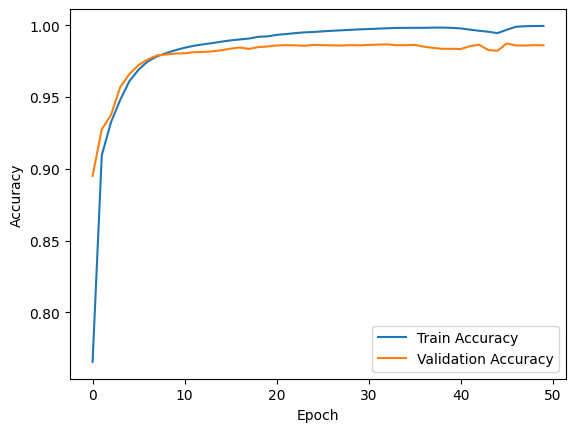

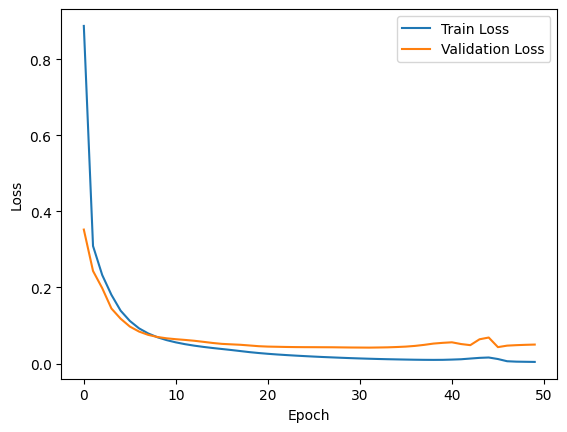

In [ ]:
# Define model, for a fully-connected network the input must be properly adapted
model = tf.keras.Sequential([

            tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),

            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128,activation='relu') ,
            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Dense(units=10 ,activation= 'softmax')
        ])

# Set hyperparameters
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 50

split_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(2500)

# Initialisation des listes pour le suivi de l'évolution
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training here
for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x_batch, y_batch in split_ds:
        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = loss_function(y_batch, predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Suivi de l'évolution sur le jeu d'entraînement
        epoch_loss_avg.update_state(loss)
        epoch_accuracy.update_state(y_batch, predictions)

    train_losses.append(epoch_loss_avg.result().numpy())
    train_accuracies.append(epoch_accuracy.result().numpy())

    # Évaluation sur le jeu de validation
    val_predictions = model(x_val)
    val_loss = loss_function(y_val, val_predictions)
    val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, val_predictions)

    # Suivi de l'évolution sur le jeu de validation
    val_losses.append(val_loss.numpy())
    val_accuracies.append(val_accuracy.numpy())

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")


# Plot training history
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_predictions = model(x_val)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, test_predictions)

In [ ]:
test_accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.986>

---
# Préparation des données Fashion MNIST

Vous allez utiliser le jeu de données Fashion MNIST qui contient des images de vétements, le but va être de définir un CNN qui va apprendre à reconnaître et correctement classifier les images.

Objectifs principaux :
- Définir une architecture et des hyper-paramètres adaptés
- Obtenir 90% d'accuracy sur le jeu de test

Objectifs secondaires :
- Entraînement en mini-batches
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu d'entrainement sur un graph
- Suivi de l'évolution de la loss et de l'accuracy sur le jeu de validation sur un graph
- Utilisation de batch-normalizations
- Utilisation d'un dropout
- Rendre générique la phase d'entrainement du modèle afin de limiter les copier-collers des parties précédentes

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0
# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
# Split train val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

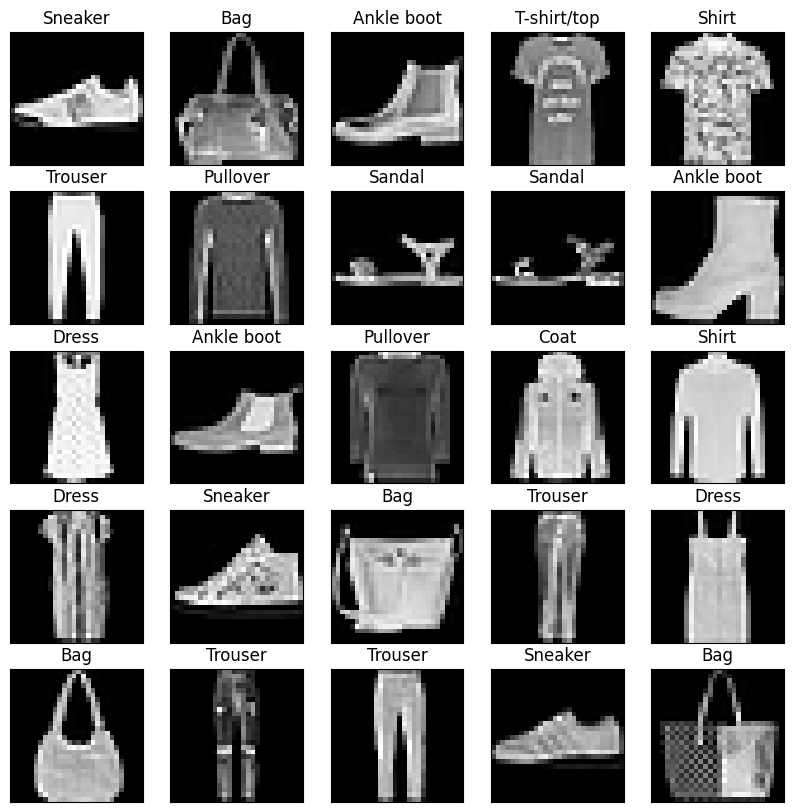

In [ ]:
# Plot grid with first 25 training images with their corresponding label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(class_names[y_train[i]])
plt.show()

In [ ]:
def train_CNN(layers,loss_funct,opti,epochs,nb_batches) :
  # Define model, for a fully-connected network the input must be properly adapted
  model = tf.keras.Sequential(layers)

  # Set hyperparameters
  loss_function = loss_funct
  optimizer = opti
  epochs = epochs

  split_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(nb_batches)

  # Initialisation des listes pour le suivi de l'évolution
  train_losses = []
  train_accuracies = []
  val_losses = []
  val_accuracies = []

  # Training with validation data
  for epoch in range(epochs):
      epoch_loss_avg = tf.keras.metrics.Mean()
      epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

      for x_batch, y_batch in split_ds:
          with tf.GradientTape() as tape:
              predictions = model(x_batch)
              loss = loss_function(y_batch, predictions)

          gradients = tape.gradient(loss, model.trainable_variables)
          optimizer.apply_gradients(zip(gradients, model.trainable_variables))

          epoch_loss_avg.update_state(loss)
          epoch_accuracy.update_state(y_batch, predictions)

      # Suivi de l'évolution sur le jeu d'entraînement
      train_losses.append(epoch_loss_avg.result().numpy())
      train_accuracies.append(epoch_accuracy.result().numpy())

      # Évaluation sur le jeu de validation
      val_predictions = model(x_val)
      val_loss = loss_function(y_val, val_predictions)
      val_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_val, val_predictions)

      # Suivi de l'évolution sur le jeu de validation
      val_losses.append(val_loss.numpy())
      val_accuracies.append(val_accuracy.numpy())

      print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]}, Train Accuracy: {train_accuracies[-1]}, Validation Loss: {val_losses[-1]}, Validation Accuracy: {val_accuracies[-1]}")

  # Plot training history
  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  return model

Epoch 1/50, Train Loss: 1.0543549060821533, Train Accuracy: 0.6499375104904175, Validation Loss: 0.7121517062187195, Validation Accuracy: 0.7430833578109741
Epoch 2/50, Train Loss: 0.5825291275978088, Train Accuracy: 0.7952916622161865, Validation Loss: 0.5227401852607727, Validation Accuracy: 0.8161666393280029
Epoch 3/50, Train Loss: 0.4889828562736511, Train Accuracy: 0.8292708396911621, Validation Loss: 0.4758129119873047, Validation Accuracy: 0.8375833630561829
Epoch 4/50, Train Loss: 0.44462117552757263, Train Accuracy: 0.8452500104904175, Validation Loss: 0.4455934762954712, Validation Accuracy: 0.843916654586792
Epoch 5/50, Train Loss: 0.41279783844947815, Train Accuracy: 0.8565624952316284, Validation Loss: 0.4168505072593689, Validation Accuracy: 0.8569999933242798
Epoch 6/50, Train Loss: 0.38853055238723755, Train Accuracy: 0.8646875023841858, Validation Loss: 0.3979170322418213, Validation Accuracy: 0.862416684627533
Epoch 7/50, Train Loss: 0.37031424045562744, Train Accura

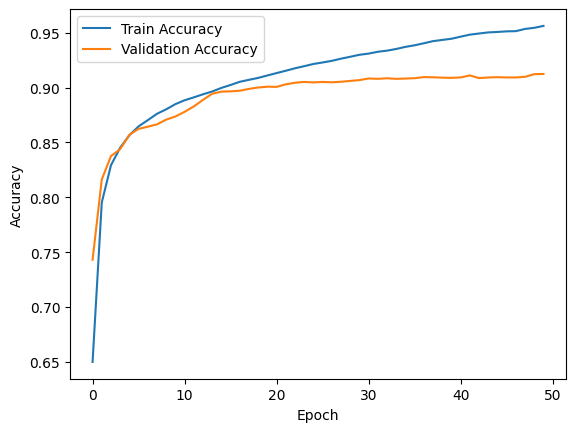

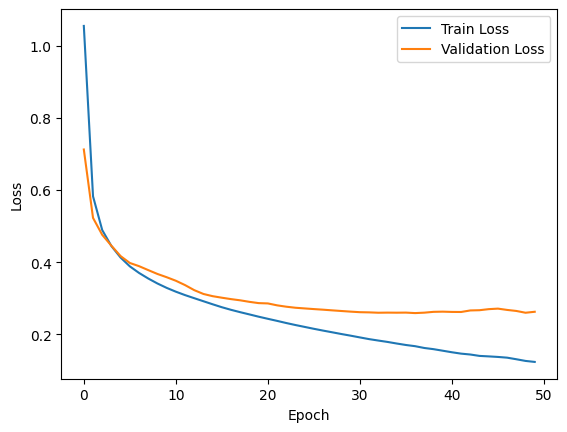

In [ ]:
# Define model, for a fully-connected network the input must be properly adapted
layers = [
            tf.keras.layers.Conv2D(32, 5, strides=1, padding='same', activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units=128,activation='relu') ,
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(units=10 ,activation= 'softmax')
        ]

# Set hyperparameters
loss_funct = tf.keras.losses.SparseCategoricalCrossentropy()
opti = tf.keras.optimizers.Adam()
epochs = 50
nb_batches = 2500

model = train_CNN(layers,loss_funct,opti,epochs,nb_batches)


Si l'apprentissage ci-dessus s'est bien passé l'executions des 2 cellules de code suivantes devraient vous afficher respectivement les 25 premières images de test avec le label prédit et le label réel pour chaque et les 40 premières images de test avec les probabilités émisent par le modèle pour chacune des classes.

La variable 'predictions' doit contenir les prédictions obtenus sur le jeu de test.

In [ ]:
predictions = model(x_test)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()(y_test, predictions)

In [ ]:
test_accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.9104>

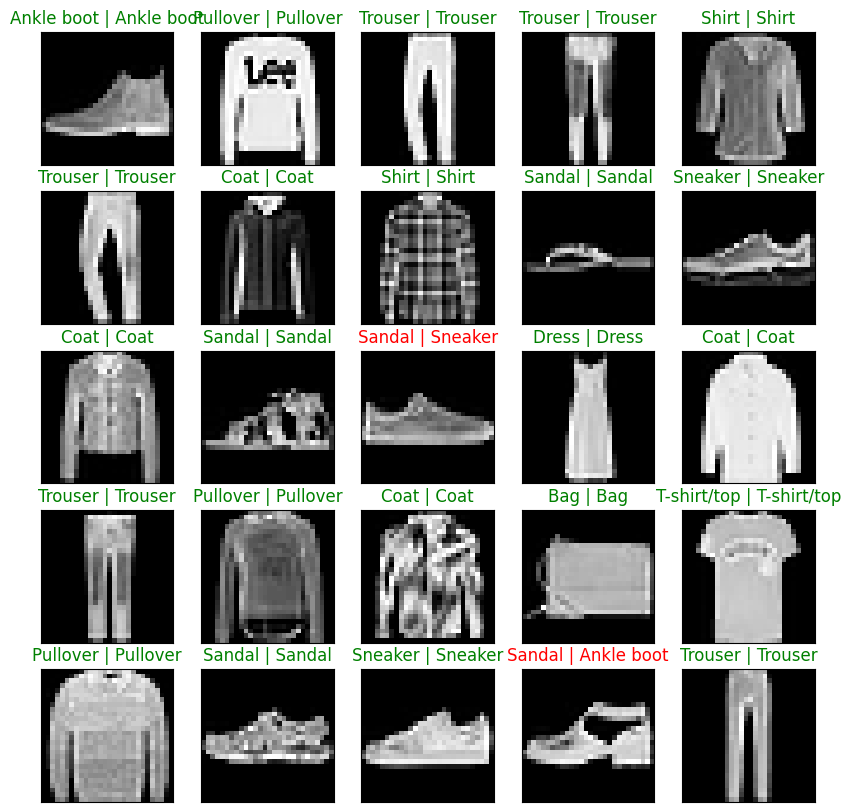

In [ ]:
# Plot grid with first 25 test images with their predicted and true label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    pred = predictions[i].numpy().argmax()
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f'{class_names[pred]} | {class_names[true]}', color=color)
plt.show()

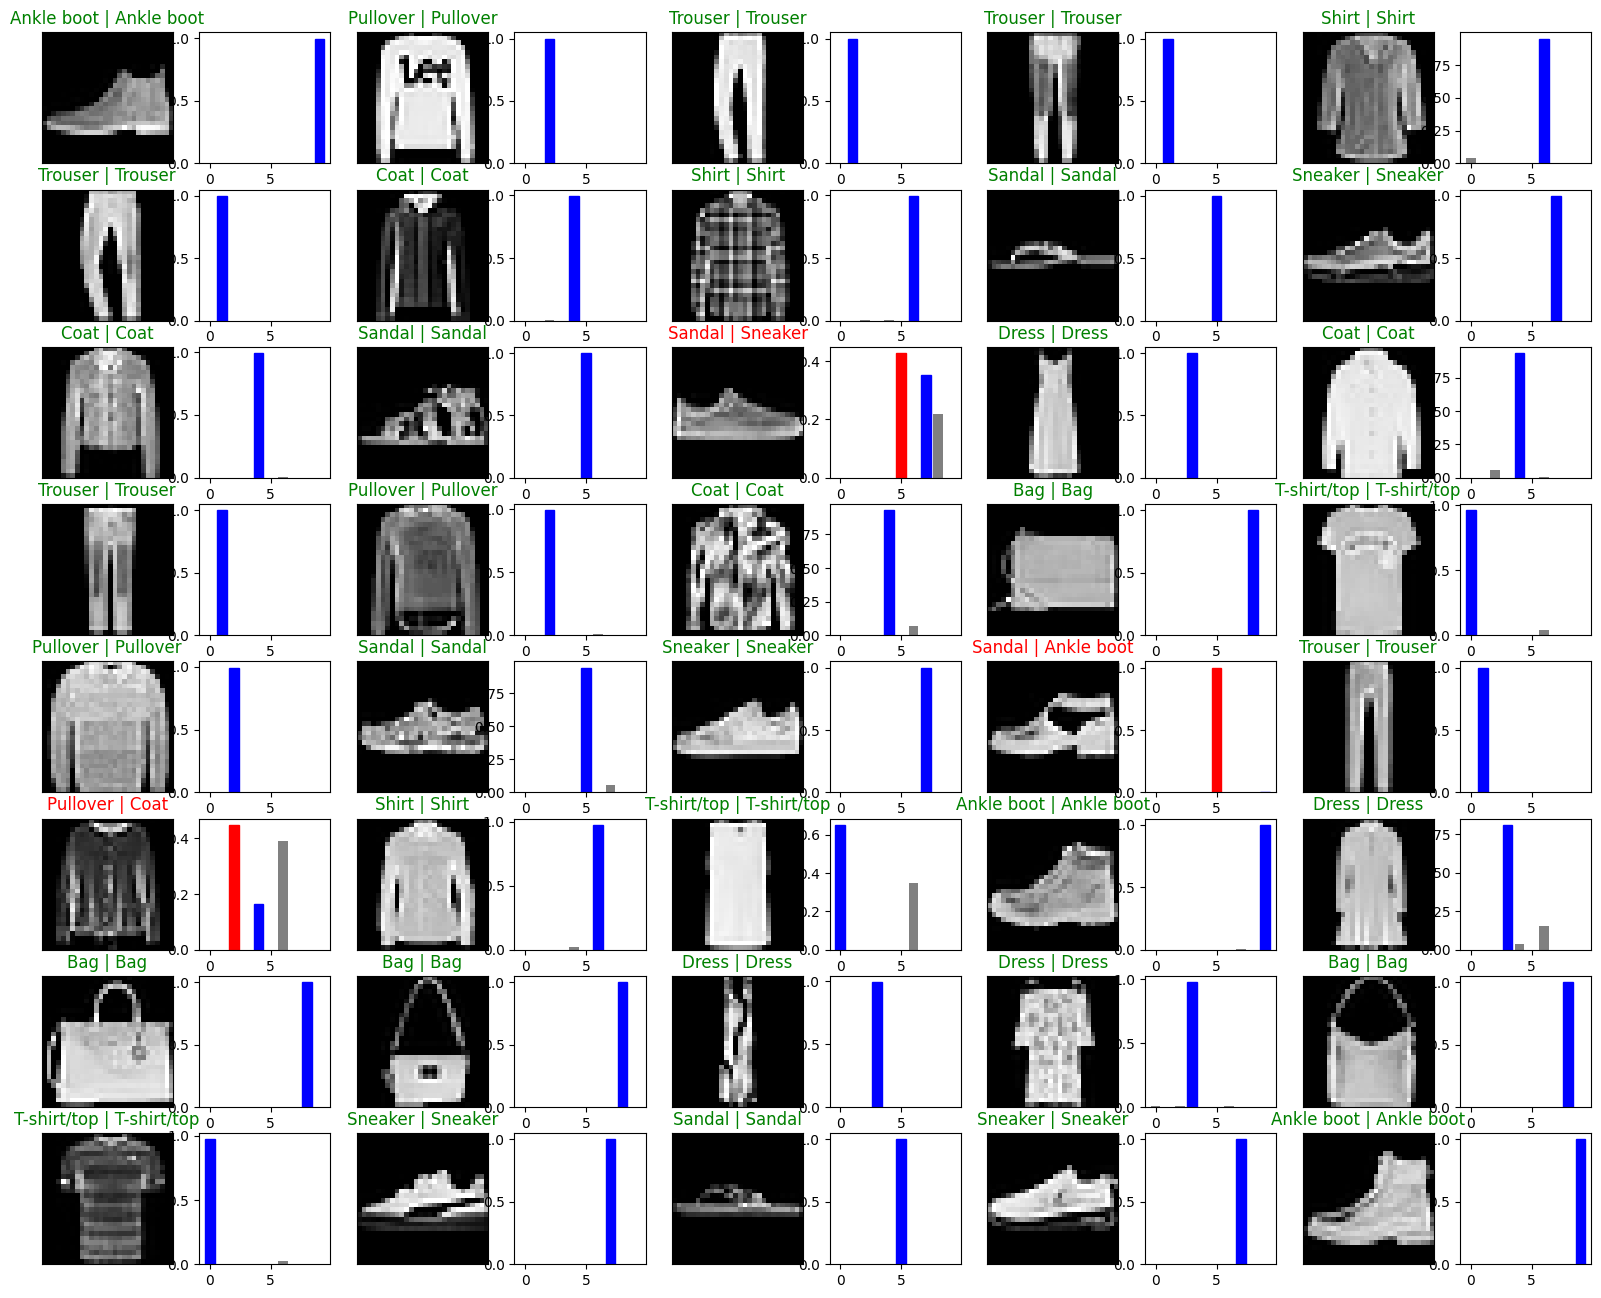

In [ ]:
# Plot grid with first 40 test images with the model probabilities
plt.figure(figsize=(20, 16))
for i in range(40):
    plt.subplot(8, 10, (i*2)+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    pred = predictions[i].numpy().argmax()
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f'{class_names[pred]} | {class_names[true]}', color=color)
    plt.subplot(8, 10, (i*2)+2)
    barplt = plt.bar(list(range(len(class_names))), predictions[i].numpy(),
                     color='gray')
    barplt[pred].set_color('red')
    barplt[true].set_color('blue')
plt.show()